### 3.1 퍼셉트론에서 신경망으로

##### 활성화 함수의 등장
- 활성화 함수(activation function): 입력 신호의 총합을 출력 신호로 변환하는 함수
- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다

$  a = b + w_1x_1 + w_2x_2 $  
$ y = h(a) $

- 일반적으로 단순 퍼셉트론은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리킨다
- 다층 퍼셉트론은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킨다

#### 3.2.1 시그모이드 함수

$ h(x) = \frac{1}{1 + exp^(-x)} $

#### 3.2.2 계단 함수 구현하기

In [1]:
# 계단 함수 구현하기

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
# numpy array를 계단 함수의 input으로 받을 수 있도록 함수 수정

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [4]:
y.astype(np.int)

array([0, 1, 1])

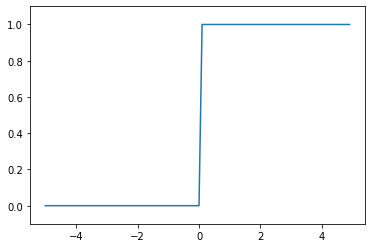

In [5]:
# 계단 함수의 그래프

import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.4 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
# Numpy의 broadcasting

t = np.array([1.0, 2.0, 3.0])
1.0 + t, 1.0 / t

(array([2., 3., 4.]), array([1.        , 0.5       , 0.33333333]))

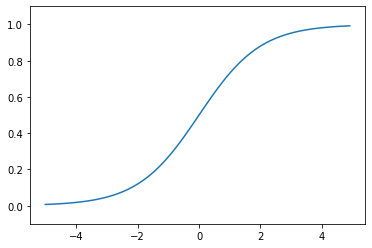

In [8]:
# 시그모이드 함수의 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드(sigmoid)란 'S자 모양'이라는 뜻이다
- 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지는데, 그 이유는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있기 때문이다. 다시 말해, 합성함수의 최종 형태 또한 선형 함수가 되어버린다.

$ h(x) = cx $  
$ y(x) = h(h(h(x))) = c^3x = ax $

#### 3.2.7 ReLU 함수

- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

$ h(x) = x (x>0) $  
$ h(x) = 0 (x\leq0) $

In [9]:
def relu(x):
    return np.maximum(0, x) # 두 입력 중 큰 값을 선택해서 반환하는 함수

### 3.3 다차원 배열의 계산

In [10]:
import numpy as np

A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[1 2 3 4]
1
(4,)
4
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [12]:
# 행렬의 곱(행렬의 내적)

A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [14]:
# 행렬의 곱(행렬의 내적)

A = np.array([[1, 2, 3],
              [4, 5, 6]]) # 2 x 3
B = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3 x 2

np.dot(A, B), np.dot(A, B).shape

(array([[22, 28],
        [49, 64]]),
 (2, 2))

In [15]:
# 행렬과 벡터의 곱

A = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3 x 2
B = np.array([7, 8]) # (2, )

np.dot(A, B), np.dot(A, B).shape # 행렬과 벡터의 곱은 벡터

(array([23, 53, 83]), (3,))

#### 3.3.3 신경망의 내적

In [16]:
X = np.array([1, 2]) # (2, )
W = np.array([[1, 3, 5],
              [2, 4, 6]]) # 2 x 3
Y = np.dot(X, W)
Y2 = np.dot(X.T, W) # 엄격하게 말하면 X.T 시켜야 내적에서 대응되는 차원의 원소 수가 같아짐
Y, Y2

(array([ 5, 11, 17]), array([ 5, 11, 17]))

### 3.4 3층 신경망 구현하기

- 이번 절의 핵심: 신경망에서의 계산을 행렬 계산으로 정리할 수 있다!

![nn](figures/fig3-17.JPG)

$ a_1^{(1)} = x_1w_{11}^{(1)} + x_2w_{12}^{(1)} + b_1^{(1)} $  
$ a_2^{(1)} = x_1w_{21}^{(1)} + x_2w_{22}^{(1)} + b_1^{(1)} $  
$ a_3^{(1)} = x_1w_{31}^{(1)} + x_2w_{32}^{(1)} + b_1^{(1)} $

- 한 층에서의 편향(bias) 뉴런은 하나뿐!

In [22]:
# 다차원배열로 표현한다면?

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3]) # 책에서는 이렇게 나와있는데, 한 층에는 편향이 하나이므로 값이 모두 같아야 하는 것이 아닌지...?

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

In [23]:
# 활성화 함수로 sigmoid 함수를 사용한다면?

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


- 1층에서 2층으로 가는 과정

![nn](figures/fig3-19.JPG)

- 1층에서의 input 값은 1층의 활성화함수를 통과해 나온 출력값들, $ z_1, z_2, z_3 $

$ a_1^{(2)} = z_1^{(1)}w_{11}^{(2)} + z_2^{(1)}w_{12}^{(2)} + z_3^{(1)}w_{13}^{(1)} + b_1^{(2)} $  
$ a_2^{(2)} = z_1^{(1)}w_{21}^{(2)} + z_2^{(1)}w_{22}^{(2)} + z_3^{(1)}w_{23}^{(1)} + b_1^{(2)} $

In [25]:
# 다차원배열로 나타낸다면?

W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2]) # 여기서도 b의 값은 항상 일정해야 하는 것이 아닌지..?

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

Z2

(3,)
(3, 2)
(2,)


array([0.62624937, 0.7710107 ])

- 2층에서 출력층으로 가는 과정

![nn](figures/fig3-20.JPG)

- 2층에서의 input 값은 2층의 활성화함수를 통과해 나온 출력값, Z2 --> 사이즈는 (2, )

$ a_1^{(3)} = z_1^{(2)}w_{11}^{(3)} + z_2^{(1)}w_{12}^{(3)} + b_1^{(3)} $  
$ a_2^{(3)} = z_1^{(2)}w_{21}^{(3)} + z_2^{(1)}w_{22}^{(3)} + b_1^{(3)} $

In [26]:
# 다차원배열로 나타낸다면?

def identity_function(x): # 항등함수
    return x

W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

Y

array([0.31682708, 0.69627909])

- 출력층의 활성화 함수는 풀고자 하는 문제의 성격에 맞게 정한다.
- 회귀: 항등함수, 분류: 시그모이드 함수, 다중 클래스 분류: 소프트맥스 함수

#### 3.4.3 구현 정리

In [28]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return Y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 3.5 출력층 설계하기

- 항등 함수(identity function): 입력을 그대로 출력하는 함수
- 소프트맥수 함수(softmax function): 분류에서 사용.

$ y_k = {{exp(a_k)} \over {\sum_{i=1}^{n} exp(a_i)}} $

- $ exp(x) $는 $e^x$를 뜻하는 지수함수 ($e$는 자연상수)
- $n$: 출력층의 뉴런 수(최종 출력값 수)
- $y_k$: 전체 출력값 중에서 $k$번째 출력값

만약 출력값이 총 3개인 분류 task에서 첫 번째 출력값을 소프트맥수 함수의 input으로 넣는다면 출력값은?

$ y_1 = {{e^{a_1}} \over {e^{a_1} + e^{a_2} + e^{a_3}}} $

In [29]:
# 소프트맥스 함수 구현

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [30]:
# 소프트맥스 함수를 파이썬 함수로 정의

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

#### 3.5.2 소프트맥스 함수 구현 시 주의점

- 